* Evan Perez
* ID: 24212505
* Senior Design 1
* Dr. Yunhua Zhao

#Part A: Model Code

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
'''
1. Euclidean distance
  - find the euclidean distance of two points,
    calculating the sum of the differences of points x and y,
    then returning the square root
'''

def euclid_dist(x, y):

  #calculates the difference between y and x and squares it,
  #then calculates sum of the elements obtained from np.square
  sum_squares = np.sum(np.square(y - x))

  #calculates the square root of the sum of squares and returns the result
  return np.sqrt(sum_squares)

'''
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))

print(euclid_dist(point1, point2))
'''

'\npoint1 = np.array((1, 2, 3))\npoint2 = np.array((1, 1, 1))\n\nprint(euclid_dist(point1, point2))\n'

In [19]:
'''
2. Manhattan Distance
  - utlizes the formula |x1 - x2| + |y1 - y2| to caculate the distance between two points
'''


def manhattan_dist(x, y):
  #calculates the absolute distance between corresponding elements in x and y
  #then calculates the the sum of the elements obtained from np.abs
  return np.sum(np.abs(x - y))



In [20]:
'''
3. Accuracy and Genralization error of two vectors

  - allows us to see accuracy metrics and gernalization error of our model


'''

def acc_and_err(true, predicted):

  #counts the number of predicted values that were true
  correct = np.sum(true == predicted)

  #counts the total number of true values
  total = len(true)

  #gives a percetnages on the number of samples correctly labeled over the total of true labels
  acc = correct / total

  #generalization error = 1 - the accuracy
  gen_err = 1 - acc

  return acc, gen_err




In [108]:
'''

4. Precision, Recall, F1 Scores

- additional metrics to evaluate our model
- precision -> "out of all positve predictions made, how many were true?"
- recall -> "out of all data samples that should be predicted as true, how many did we correctly predict as true?"
- f1 score -> measures how effectively our model makes trade offs between precision and recall

'''


def precision(true_positives, false_positives):
  #calculates the percentages of true positves over total positves predicted
  if true_positives + false_positives == 0:
      return 0
  else:
      return true_positives / (true_positives + false_positives)

def recall(true_positives, false_negatives):
  #calculates the percentages of true positives over all samples that should have been true

   if true_positives + false_negatives == 0:
      return 0
   else:
      return true_positives / (true_positives + false_negatives)


def f1_score(precision, recall):
  #calculates the produc tof the precision and recall divided by the sum of precision and recall
  if precision + recall == 0:
      return 0
  else:
      return 2 * (precision * recall) / (precision + recall)





In [109]:
'''
5. Confusion matrix of two vectors

'''


def conf_matrix(true, predicted):

  #intializes an empty 2x2 matrix

  cm = np.zeros((2,2))

  #iterates through each pair of true and predicted lables with zip
  for true, predicted in zip(true, predicted):

    #check if true label is 1 and predicted label is also 1
    #if so, then increment the count inthe top-left cell of the confusion matrix
    if true == 1 and predicted == 1:
      cm[0,0] += 1

    #check if true label is 0 and predicted label is 1
    #if so, then increment the count inthe top-right cell of the confusion matrix
    elif true == 0 and predicted == 1:
      cm[0,1] += 1

    #check if true label is 1 and predicted label is 0
    #if so, then increment the count inthe bottom-left cell of the confusion matrix
    elif true == 1 and predicted == 0:
      cm[1,0] += 1

  #check if true label is 0 and predicted label is also 0
    #if so, then increment the count int he bottom right cell of the confusion matrix
    elif true == 0 and predicted == 0:
      cm[1,1] += 1

  #convert the confusion matrix to integer type and return the result
  return cm.astype(int)


'''
true_labels = np.array([1, 0, 1, 1, 0])
predicted_labels = np.array([1, 1, 0, 1, 0])

print(conf_matrix(true_labels, predicted_labels))
'''

'\ntrue_labels = np.array([1, 0, 1, 1, 0])\npredicted_labels = np.array([1, 1, 0, 1, 0])\n\nprint(conf_matrix(true_labels, predicted_labels))\n'

In [57]:

def calculate_roc_curve(true, predicted):

  #sort the predictions by probability in descending order
  sorted_indices = np.argsort(predicted[::-1])
  sorted_labels = true[sorted_indices]

  #Initialize arrays to store true postive rate and false positve rate
  tpr_list = [0]
  fpr_list = [0]


  #Intialize sounds for true postives and fales postives
  tp_count = 0
  fp_count = 0


  #iterate through each prediction in sorted order
  for label in sorted_labels:
    if label == 1:
      tp_count += 1
    else:
      fp_count += 1

    #compute true positive rate and false positive rate
    tpr = tp_count / sum(true)
    fpr = fp_count / (len(true_labels) - sum(true_labels))

    #append true positve rate and false postive rate to lists
    tpr_list.append(tpr)
    fpr_list.append(fpr)

  return tpr_list, fpr_list


def roc_curve(true, predicted):
  tpr_list, fpr_list = calculate_roc_curve(true, predicted)

  #plots the result of the calculated ROC
  plt.figure(figsize = (8,6))
  plt.plot(fpr_list,tpr_list, color='blue',lw=2, label='ROC curve')
  plt.plot([0,1], [0,1], color='gray', linestyle='--')
  plt.xlabel('False Postive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Reciever Operating Characteristic (ROC) Curve')
  plt.legend(loc ='lower right')
  plt.grid(True)
  plt.show()


'''
true_labels = np.array([1, 0, 1, 1, 0])
predicted_probs = np.array([0.9, 0.3, 0.7, 0.8, 0.2])  # Probabilities of positive class


roc_curve(true_labels, predicted_probs)
'''

'\ntrue_labels = np.array([1, 0, 1, 1, 0])\npredicted_probs = np.array([0.9, 0.3, 0.7, 0.8, 0.2])  # Probabilities of positive class\n\n\nroc_curve(true_labels, predicted_probs)\n'

In [24]:

'''
7. Area Under Curve (AUC) given true and predicted probabilites


'''
def auc(true, predicted):

  #combine true and predicted probabilites into tuples
  data = list(zip(true, predicted))

  #sort the data by predicted probabilities in descending order
  sorted_data = sorted(data, key=lambda x: x[1], reverse=True)


  #initialize variables for calculating AUC
  auc = 0.0
  tp_prev = 0
  fp_prev = 0
  tp_curr = 0
  fp_curr = 0

  #iterate through sorted data to calculate AUC
  for true, prob in sorted_data:
    if true == 1:
      tp_curr += 1
    else:
      fp_curr += 1


    #calculate trapezoidal area for this point
    auc += (fp_curr - fp_prev) * (tp_curr + tp_prev) / 2.0

    #update previous values for next iteration
    tp_prev = tp_curr
    fp_prev = fp_curr

  #normalize AUC by dividing by the total number of positive and negative samples
  total_positives = sum(true)
  total_negatives = len(true) - total_positives
  auc /= float(total_positives * total_negatives)

  return auc

In [56]:
def precision_recall_curve(true, predicted):

  #combine true labels and predicted probabilities into a list of tuples
  data = list(zip(true, predicted))

  #sort the data based on predicted probabilites in descending order
  sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

  #initlize lists to store precision and recall values
  precision_values = []
  recall_values = []

  #variables for true positives, false positives, and false negatives
  tp = 0
  fp = 0
  fn = sum(true)

  #iterate through sorted data to calcualte precision and recall at each point
  for true_label, prob in sorted_data:
    if true_label == 1:
      tp += 1
      fn -= 1
    else:
      fp += 1

    #calculate precision and recall if there are postive predictions
    if tp + fp > 0:
      precision = tp / (tp + fp)
    else:
      precision = 0

    if tp +fn > 0:
      recall = tp / (tp + fn)
    else:
      recall = 0

    #append precision and recall to their respective lists
    precision_values.append(precision)
    recall_values.append(recall)
  #visulzie the precision recall curve
  plt.figure(figsize=(8,6))
  plt.plot(recall_values, precision_values, marker='.')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.grid(True)
  plt.show()


'''
np.random.seed(42)
true_labels = np.random.randint(0, 2, size=100)
predicted_probs = np.random.rand(100)

# Calculate precision-recall curve and plot
precision_recall_curve(true_labels, predicted_probs)
'''

'\nnp.random.seed(42)\ntrue_labels = np.random.randint(0, 2, size=100)\npredicted_probs = np.random.rand(100)\n\n# Calculate precision-recall curve and plot\nprecision_recall_curve(true_labels, predicted_probs)\n'

#Part A: KNN

In [141]:
#K nearest neighbors class

class KNN_Classifier:
  def __init__(self):
    self.X_train = None
    self.Y_train = None
    self.n_neighbors = None
    self.weights = None

  def fit(self, X, Y, n_neighbors, weights, distance_func, idw = False, **kwargs):
    self.X_train = X
    self.Y_train = Y
    self.n_neighbors = n_neighbors
    self.distance_func = distance_func
    self.weights = weights
    self.idw = idw
    self.kwargs = kwargs

  def euclid_dist(self, x, y):

    #calculates the difference between y and x and squares it,
    #then calculates sum of the elements obtained from np.square
    sum_squares = np.sum(np.square(y - x))

    #calculates the square root of the sum of squares and returns the result
    return np.sqrt(sum_squares)

  @staticmethod
  def manhattan_dist(x, y):
    #calculates the absolute distance between corresponding elements in x and y
    #then calculates the the sum of the elements obtained from np.abs
    return np.sum(np.abs(x - y))




#used to predict the class labels for input data
  def predict(self, X):

    #store prediction labels
    predictions = []

    #iterate over each sample in the input data
    for sample in X.values:
      #store distances from sample to training data points
      distances = []

      #calculates distances from sample to each training data point
      for x_train in self.X_train.values:
        if self.distance_func == 'euclidean':
          dist = [self.euclid_dist(sample, x_train)]
          distances.append(dist)
        else:
          dist = [self.manhattan_dist(sample, x_train)]
          distances.append(dist)
      #sort distances and get indices of k nearest neighbors
      sorted_indices = np.argsort(distances)

      #stores class labels of the k nearest neighbors
      k_nearest_neighbors = []

      #iterate over the indices of the k nearest neighbors
      for idx in sorted_indices[:self.n_neighbors]:

        #retrieve class label of the neighbor at index 'idx' from Y_train
        knn = tuple(self.Y_train[idx])
        #add class label to list of k nearest neigbors
        k_nearest_neighbors.append(knn)

      #make predictions based on weights and neighbors
      if self.weights == 'uniform':
        prediction = max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)

      elif self.weights == 'distance':

        #check if inverse distance weighting is enabled
        if self.idw:
          #store weights of nearest neigbors
          weights = []

          #iterate over the distances of the k nearest neighbors
          for dist in distances[:self.n_neighbors]:
            #extract distance value from distance list
            distance = dist[0]
            #calculate weight using IDW and append to lsit of weights
            weights.append(1 / (distance + 1e-9))
        else:
            weights = [1] * self.n_neighbors

        #calculate weighted counts for each class label
        weighted_counts = dict()

        for neighbor, weight in zip(k_nearest_neighbors, weights):
          weighted_counts[neighbor] = weighted_counts.get(neighbor, 0) + weight
        #predict the class label with the higheset weighted count
        prediction = max(weighted_counts, key=weighted_counts.get)

      #add prediction to list of predictions
      predictions.append(prediction)

    #convert predictinos to NumPy array and reshape to column vector
    return np.array(predictions)[:,np.newaxis]


#Part B: Data Exploration

In [111]:
import pandas as pd

#10. Read in the winequality-white.csv file as a Pandas data frame.
file_path = 'winequality-white.csv'

#original file is not properly delimited
df = pd.read_csv(file_path, sep =';')

df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

In [112]:
'''
11. The target will be the “quality” column which represents rating of wine and ranges
from 3 to 8. You will need to convert it into a two-category variable consisting of “good”
(quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad”
quality wine) and 1s (representing “good” quality wine).
'''

df['target'] = (df['quality'] > 5).astype(int)

print(df[['quality','target']].head(100))

    quality  target
0         6       1
1         6       1
2         6       1
3         6       1
4         6       1
..      ...     ...
95        6       1
96        6       1
97        7       1
98        4       0
99        6       1

[100 rows x 2 columns]


In [113]:
'''
12. Use the techniques from the first recitation to summarize each of the variables in the
dataset in terms of mean, standard deviation, and quartiles. Include this in your report.
'''
#.describe allows us to view mean, standard deviation, and quartiles of each feature in our dataframe
summary_stats = df.describe()

print(summary_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [114]:
'''
13. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic
way to shuffle the data in Pandas without losing column names.
'''

#frac=1 shuffles our data for us
shuffled_df = df.sample(frac=1, random_state=42)

print(shuffled_df.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4656            6.0              0.29         0.41            10.8      0.048   
3659            5.4              0.53         0.16             2.7      0.036   
907             7.1              0.25         0.39             2.1      0.036   
4352            7.3              0.28         0.35             1.6      0.054   
3271            6.5              0.32         0.34             5.7      0.044   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4656                 55.0                 149.0  0.99370  3.09       0.59   
3659                 34.0                 128.0  0.98856  3.20       0.53   
907                  30.0                 124.0  0.99080  3.28       0.43   
4352                 31.0                 148.0  0.99178  3.18       0.47   
3271                 27.0                  91.0  0.99184  3.28       0.60   

        alcohol  quality  target  
4656  10.966667

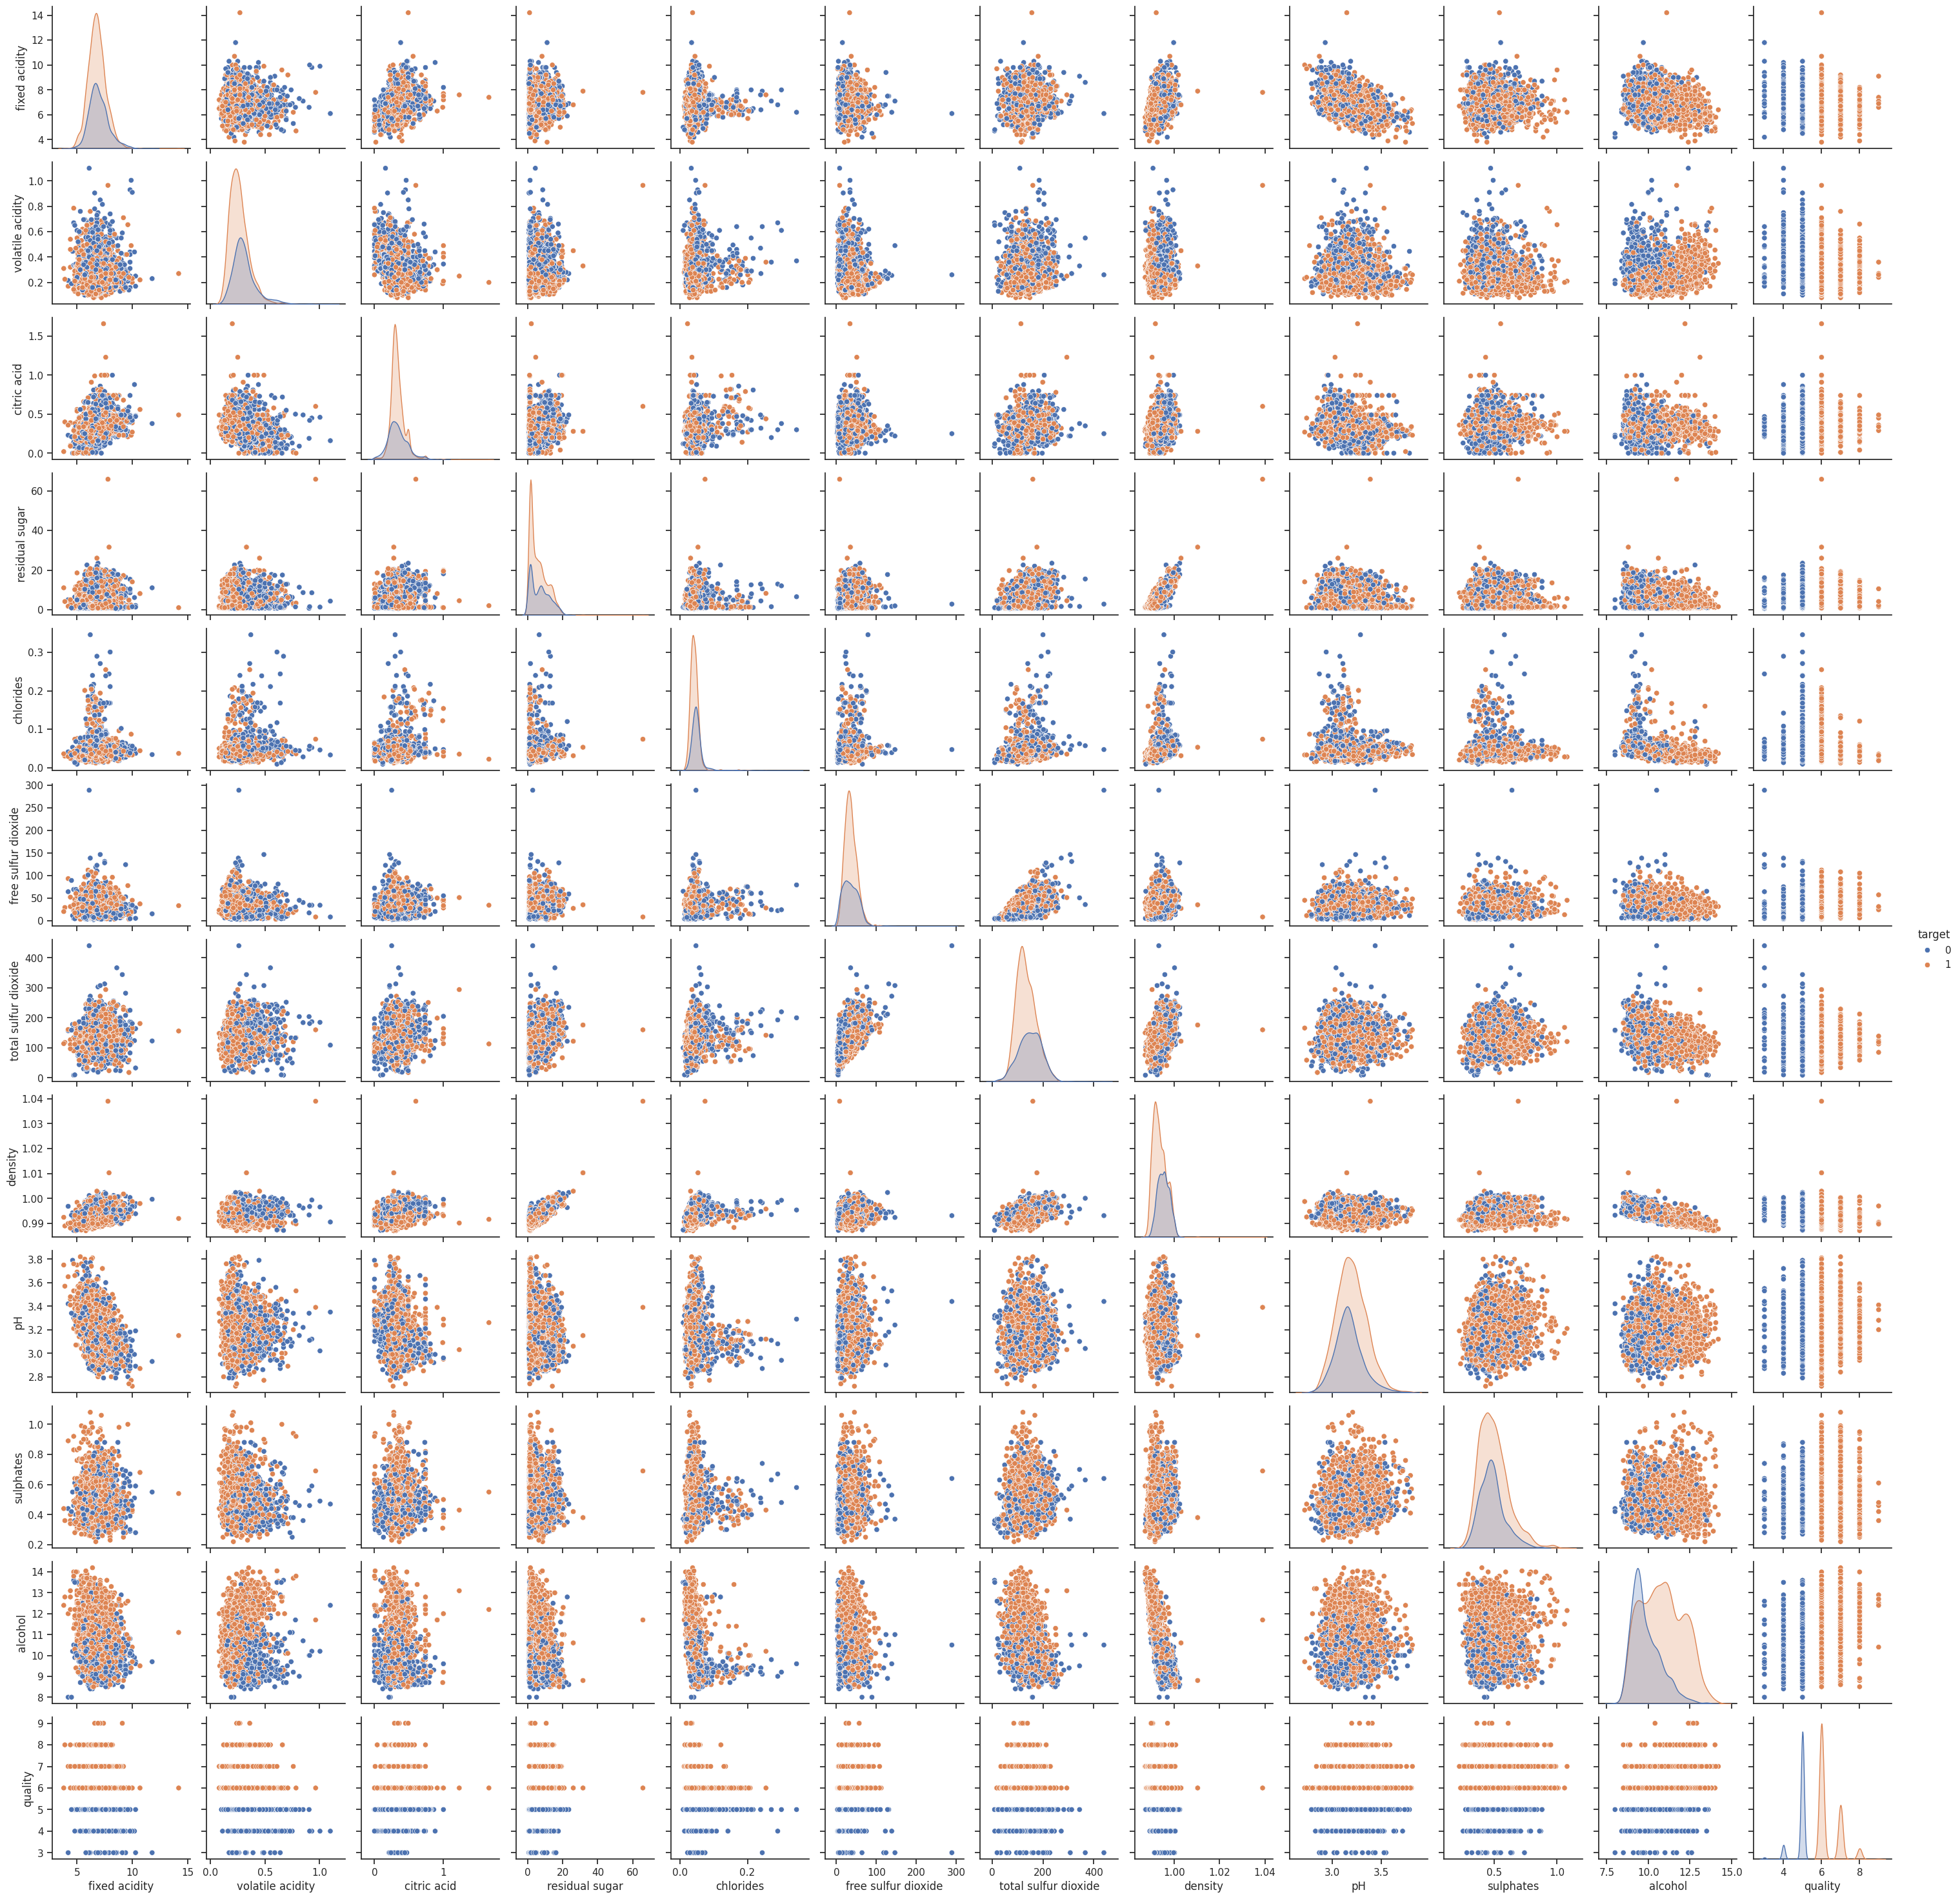

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
'''
14. Generate pair plots using the seaborn package. This will be used to identify and report
the redundant features, if there is any.

'''
#constructing a pairplot to try and spot redundancies
sns.set(style="ticks")

sns.pairplot(shuffled_df, hue="target")
plt.show()

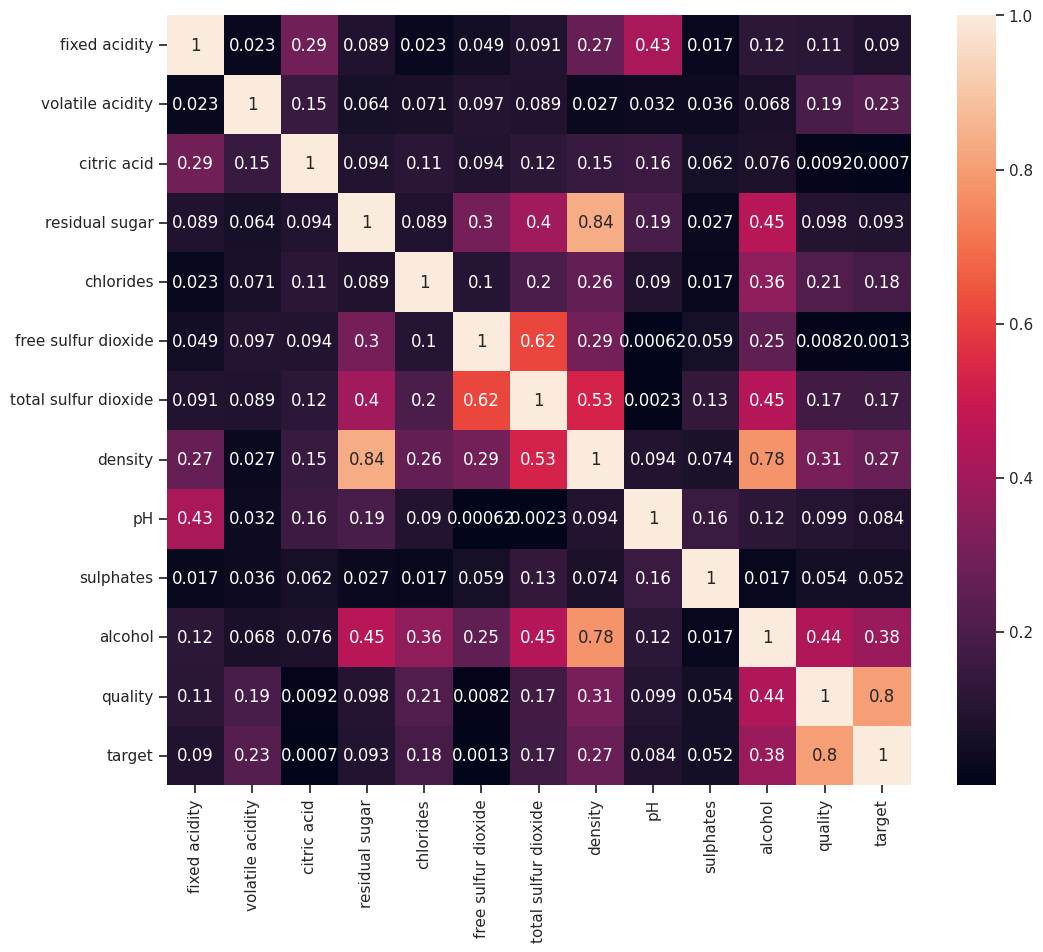

In [123]:
#using a heatmap to spot features with high correlations which indicate redundancy

cor = shuffled_df.corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True)
plt.show()


In [124]:
#15. Drop the redundant features.

reduced_df = shuffled_df.drop(columns=['total sulfur dioxide', 'density'])

reduced_df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4656            6.0              0.29         0.41           10.80      0.048   
3659            5.4              0.53         0.16            2.70      0.036   
907             7.1              0.25         0.39            2.10      0.036   
4352            7.3              0.28         0.35            1.60      0.054   
3271            6.5              0.32         0.34            5.70      0.044   
4632            6.3              0.30         0.91            8.20      0.034   
2244            7.0              0.36         0.14           11.60      0.043   
1924            7.6              0.26         0.36            1.60      0.032   
3801            8.3              0.18         0.30            1.10      0.033   
2634            8.7              0.31         0.73           14.35      0.044   

      free sulfur dioxide    pH  sulphates    alcohol  quality  target  
4656                 55.0  3.09       0.59  10.966667        7       1  
3659                 34.0  3.20       0.53  13.200000        8       1  
907                  30.0  3.28       0.43  12.200000        8       1  
4352                 31.0  3.18       0.47  10.700000        5       0  
3271                 27.0  3.28       0.60  12.000000        7       1  
4632                 50.0  3.39       0.49  11.700000        6       1  
2244                 35.0  3.13       0.51   8.900000        5       0  
1924                  6.0  3.15       0.40  10.400000        4       0  
3801                 20.0  3.02       0.51  11.000000        6       1  
2634                 27.0  2.96       0.88   8.700000        5       0

In [129]:
'''
16. Write a function named “partition” to split your data into training and test set. The
function should take 3 arguments:
• feature matrix (numpy array with rows representing data samples and columns
representing features.),
• target vector (numpy array with labels corresponding to each row of the feature matrix),
• t where t is a real number to determine the size of partition. For example, if t is set to
0.2, then 80% of the data will be used for training and 20% for testing.
• This function should return two feature matrices for training and test data, and two
target vectors for training and test data


'''

def partition(X,Y,t):

  #calculate number of samples
  n_samples = X.shape[0]

  #calculate the number of samples for training and testing
  n_train = int(n_samples * (1 -t))
  n_test = n_samples - n_train

  #split the feature matrix and target vector into training and test sets
  X_train = X[:n_train]
  X_test = X[n_train:]
  Y_train = Y[:n_train]
  Y_test = Y[n_train:]

  #return the training and test sets
  return X_train, X_test, Y_train, Y_test

# X_train, X_test, Y_train, Y_test = partition(feature_matrix, target_vector, 0.2)

Running KNN

In [130]:
'''
17. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and
using Euclidean distance.
'''

#initalize classifier
knn_classifier = KNN_Classifier()

X = reduced_df.drop(columns=['target','quality'])
Y = reduced_df['target']


X_train, X_test, Y_train, Y_test = partition(X,Y,0.2)

In [127]:
#set variables for model

knn_classifier.fit(X_train, Y_train, n_neighbors=5, weights='uniform')

#predict with our knn
test_predictions = knn_classifier.predict(X_test)

test_predictions = test_predictions.flatten()

accuracy, gen_error = acc_and_err(Y_test, test_predictions)

#calculate true postives, false, positves, and false negatives
test_true_positives = np.sum((Y_test == 1) & (test_predictions == 1))
test_false_positives = np.sum((Y_test == 0) & (test_predictions == 1))
test_false_negatives = np.sum((Y_test == 1) & (test_predictions == 0))


 # Evaluate performance: accuracy, generalization error, precision, recall, and F1 score
test_precision = precision(test_true_positives, test_false_positives)
test_recall = recall(test_true_positives, test_false_negatives)
test_f1 = f1_score(test_precision, test_recall)

'''
a. Use accuracy and F1 score to compare your predictions to the expected labels.
'''

print("Test Accuracy: ", accuracy)
print("Test Generalization Error: ", gen_error)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1: ", test_recall)

Test Accuracy:  0.65
Test Generalization Error:  0.35
Test Precision:  0.65
Test Recall:  1.0
Test F1:  1.0


Now Standardizing the training set

In [131]:

'''
b. Now standardize each feature of your training set (subtract mean and divide by
standard deviation). Use the mean and standard deviation values for each feature in the
training set to scale the test data.

'''
X_train_mean = X_train.mean()
X_train_std = X_train.std()


X_train_standardized = (X_train - X_train_mean) / X_train_std

#initalize classifier
knn_classifier = KNN_Classifier()

In [121]:
'''
c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1
score with the expected labels.
d. Compare the two accuracy values and the F1 scores; and decide whether you should
use standardized data or unscaled data for the remainder of the assignment. This will
described in the report

'''

knn_classifier.fit(X_train_standardized, Y_train, n_neighbors=5, weights='uniform')

test_predictions = knn_classifier.predict(X_test)

test_predictions = test_predictions.flatten()



# Evaluate performance: accuracy, generalization error, precision, recall, and F1 score
accuracy, gen_error = acc_and_err(Y_test, test_predictions)

#calculate true postives, false, positves, and false negatives
test_true_positives = np.sum((Y_test == 1) & (test_predictions == 1))
test_false_positives = np.sum((Y_test == 0) & (test_predictions == 1))
test_false_negatives = np.sum((Y_test == 1) & (test_predictions == 0))


test_precision = precision(test_true_positives, test_false_positives)
test_recall = recall(test_true_positives, test_false_negatives)
test_f1 = f1_score(test_precision, test_recall)


print("Test Accuracy: ", accuracy)
print("Test Generalization Error: ", gen_error)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1: ", test_recall)

Test Accuracy:  0.65
Test Generalization Error:  0.35
Test Precision:  0.65
Test Recall:  1.0
Test F1:  1.0


In [96]:
'''
e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and
determine whether or not to use it.

'''

#initalize classifier
knn_classifier = KNN_Classifier()

knn_classifier.fit(X_train, Y_train, n_neighbors=5, weights='uniform', idw=True)

test_predictions = knn_classifier.predict(X_test)

test_predictions = test_predictions.flatten()



 # Evaluate performance: accuracy, generalization error, precision, recall, and F1 score
accuracy, gen_error = acc_and_err(Y_test, test_predictions)

#calculate true postives, false, positves, and false negatives
test_true_positives = np.sum((Y_test == 1) & (test_predictions == 1))
test_false_positives = np.sum((Y_test == 0) & (test_predictions == 1))
test_false_negatives = np.sum((Y_test == 1) & (test_predictions == 0))



test_precision = precision(test_true_positives, test_false_positives)
test_recall = recall(test_true_positives, test_false_negatives)
test_f1 = f1_score(test_precision, test_recall)


print("Test Accuracy: ", accuracy)
print("Test Generalization Error: ", gen_error)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1: ", test_recall)

Test Accuracy:  0.6622448979591836
Test Generalization Error:  0.3377551020408164
Test Precision:  0.6622448979591836
Test Recall:  1.0
Test F1:  1.0


#Part C

In [142]:
'''
18. evaluate the performance of your model over each combination of
k and distance metrics from the following sets:
i. k=[1,5,9,11]
 distance = [Euclidean, Manhattan]
 weights = [uniform, distance]
19 Evaluate your model based on your own precision… functions on the test data and report the
performance measures.
i. Precision
ii. Recall
iii. F1 score
iv. Confusion matrix
v. Accuracy

'''
# Assuming X and Y are your feature matrix and target vector
X_train, X_test, Y_train, Y_test = partition(X, Y, 0.2)

#define paramter combinations
k_values = [1, 5, 9, 11]
distance_metrics = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']


#run grid search using our KNN class with the paramter combinations
for k in k_values:
    for distance_metric in distance_metrics:
        for weight in weights:
            knn_classifier = KNN_Classifier()

            #set specified paramters
            knn_classifier.fit(X_train_standardized, Y_train, n_neighbors=k, distance_func=distance_metric, weights=weight, idw=False)

            # Make predictions
            test_predictions = knn_classifier.predict(X_test)

            #include confusoin matrix before flattening
            cm = conf_matrix(Y_test, test_predictions)

            #flatten predictions for evaluation
            test_predictions = test_predictions.flatten()

            # Evaluate performance: accuracy, generalization error, precision, recall, and F1 score
            accuracy, gen_error = acc_and_err(Y_test, test_predictions)
            test_precision = precision(np.sum(Y_test == 1), np.sum((test_predictions == 1) & (Y_test == 1)))
            test_recall = recall(np.sum(Y_test == 1), np.sum((test_predictions == 1) & (Y_test == 1)))
            test_f1 = f1_score(test_precision, test_recall)





            print(f"K = {k}, Distance Metric = {distance_metric.capitalize()}, Weight = {weight.capitalize()}:")
            print("Test Accuracy:", accuracy)
            print("Test Generalization Error:", gen_error)
            print("Test Precision:", test_precision)
            print("Test Recall:", test_recall)
            print("Test F1 Score:", test_f1)
            print()
            print('Confusion Matrix: ')
            print()
            print(cm)
            print()


K = 1, Distance Metric = Euclidean, Weight = Uniform:
Test Accuracy: 0.65
Test Generalization Error: 0.35
Test Precision: 0.5
Test Recall: 0.5
Test F1 Score: 0.5

Confusion Matrix: 

[[637 343]
 [  0   0]]

K = 1, Distance Metric = Euclidean, Weight = Distance:
Test Accuracy: 0.65
Test Generalization Error: 0.35
Test Precision: 0.5
Test Recall: 0.5
Test F1 Score: 0.5

Confusion Matrix: 

[[637 343]
 [  0   0]]

K = 1, Distance Metric = Manhattan, Weight = Uniform:
Test Accuracy: 0.65
Test Generalization Error: 0.35
Test Precision: 0.5
Test Recall: 0.5
Test F1 Score: 0.5

Confusion Matrix: 

[[637 343]
 [  0   0]]

K = 1, Distance Metric = Manhattan, Weight = Distance:
Test Accuracy: 0.65
Test Generalization Error: 0.35
Test Precision: 0.5
Test Recall: 0.5
Test F1 Score: 0.5

Confusion Matrix: 

[[637 343]
 [  0   0]]

K = 5, Distance Metric = Euclidean, Weight = Uniform:
Test Accuracy: 0.65
Test Generalization Error: 0.35
Test Precision: 0.5
Test Recall: 0.5
Test F1 Score: 0.5

Confusi